<a href="https://colab.research.google.com/github/hide-squid/high-school-project-1/blob/main/%EB%B2%A0%ED%86%A0%EB%B2%A4_%EC%9A%B4%EB%AA%85_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa

y , sr = librosa.load('/content/a2.mp3')
print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

[-1.8626451e-08 -7.4505806e-09 -3.7252903e-09 ... -2.3183020e-09
 -5.7468696e-11 -1.8110882e-09]
618624
Sampling rate (Hz): 22050
Audio length (seconds): 28.06


In [ ]:
import IPython.display as ipd
ipd.Audio(y, rate = sr)

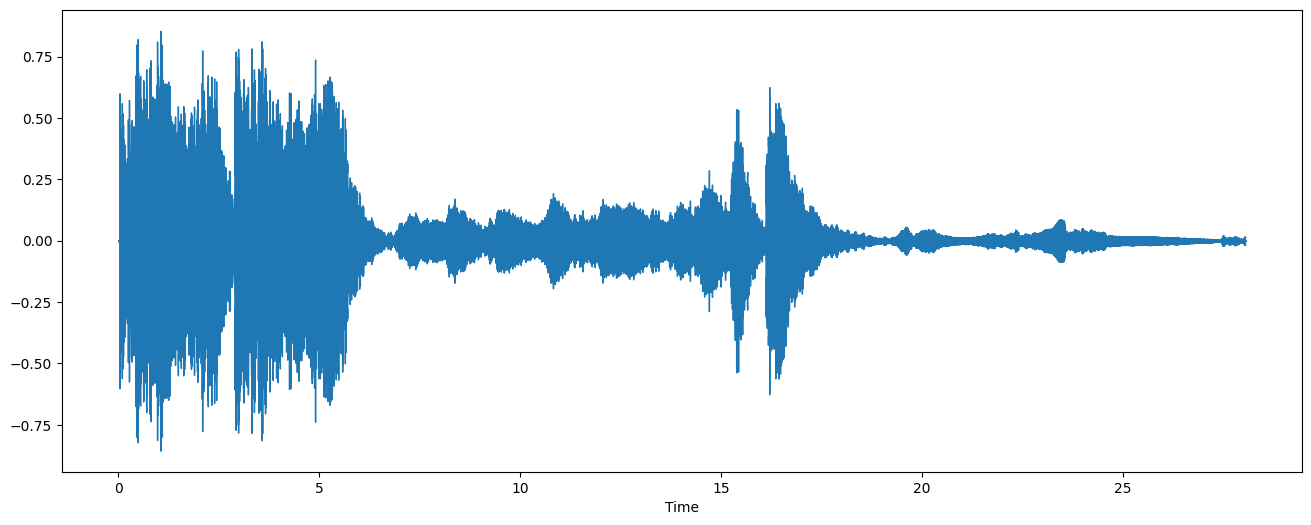

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = y, sr = sr)
plt.show()

(513, 1209)


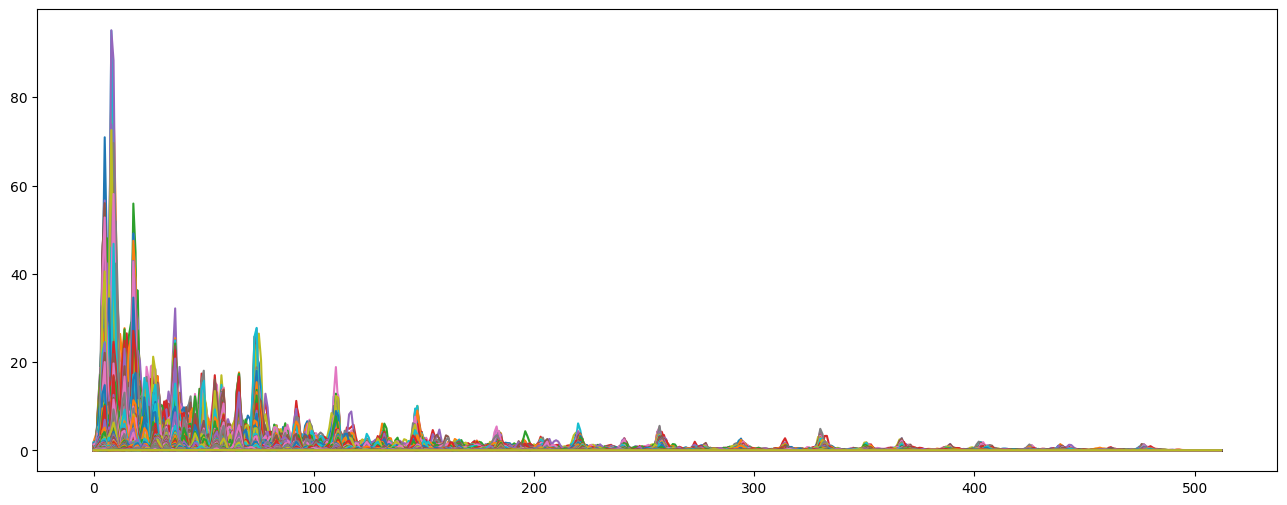

In [ ]:
import numpy as np

D = np.abs(librosa.stft(y, n_fft=1024, hop_length = 512))

print(D.shape)
plt.figure(figsize= (16, 6))
plt.plot(D)
plt.show()

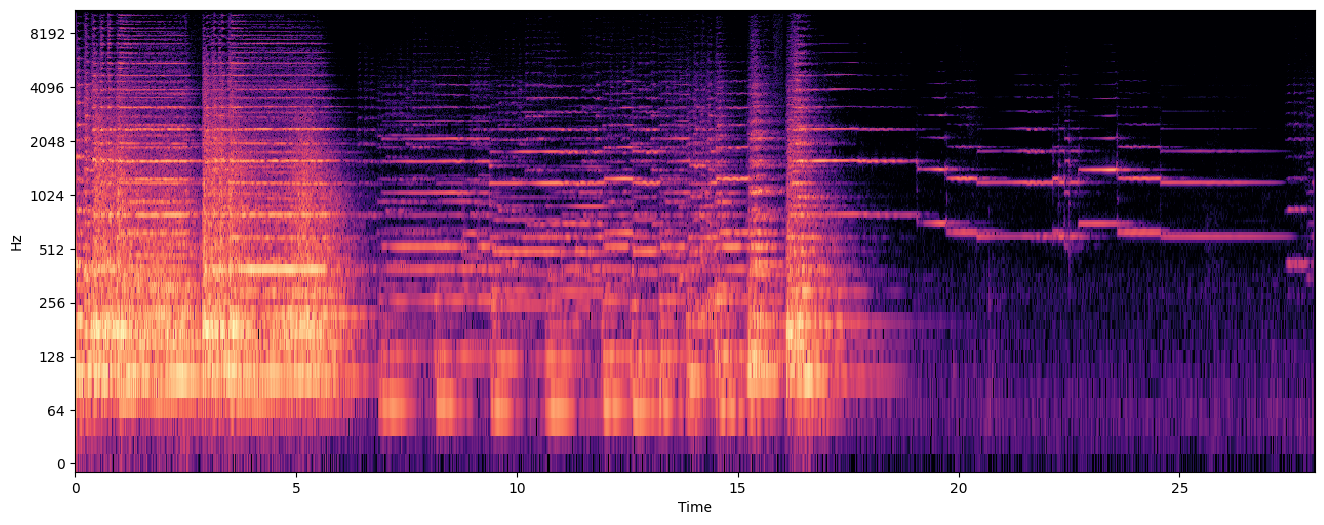

In [ ]:
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.show()

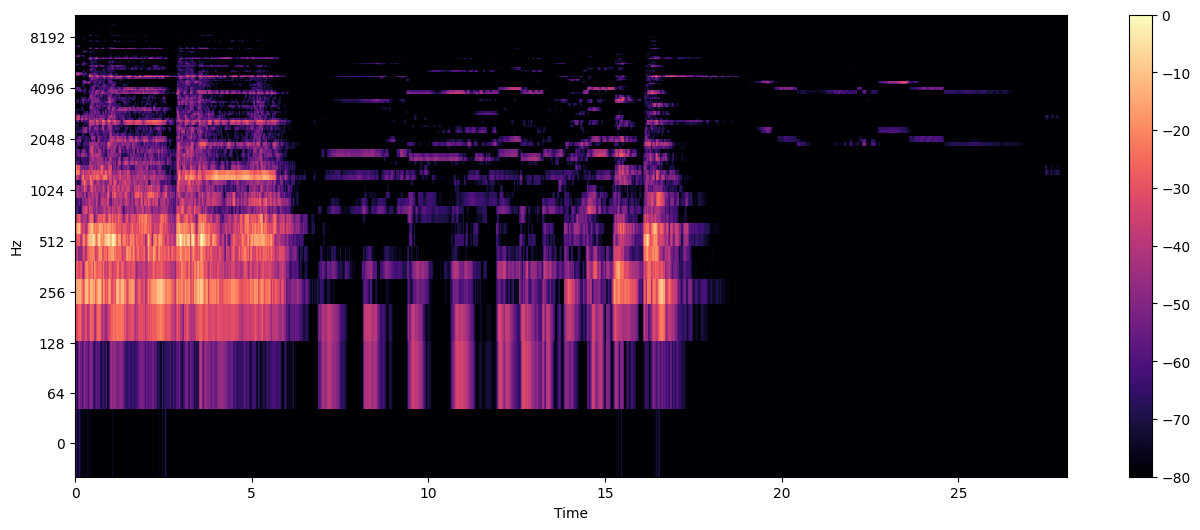

In [ ]:
S= librosa.feature.melspectrogram(y=y, sr = sr)
S_DB = librosa.amplitude_to_db(S, ref = np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length = 512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [ ]:
tempo, _=librosa.beat.beat_track(y=y, sr=sr)
print(tempo)

184.5703125


In [ ]:
zero_crossings = librosa.zero_crossings(y, pad=False)
print(zero_crossings)
print(len(zero_crossings))
print(sum(zero_crossings))

[False False False ...  True  True  True]
618624
51160


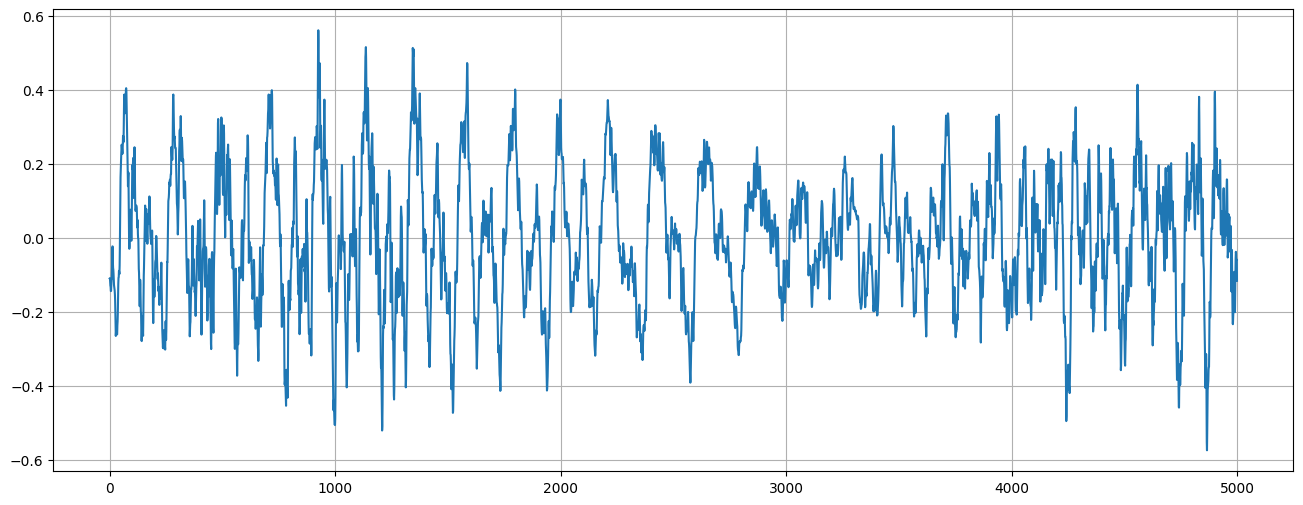

In [ ]:
n0 = 1000
n1 = 6000

plt.figure(figsize=(16, 6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

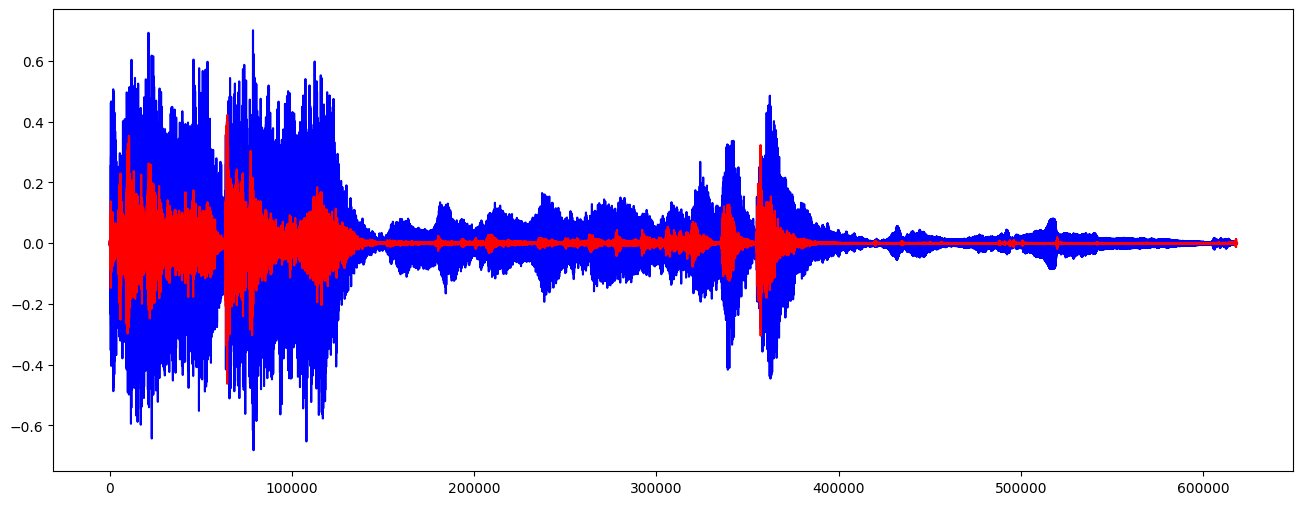

In [ ]:
y_harm, y_perc = librosa.effects.hpss(y)
plt.figure(figsize=(16, 6))
plt.plot(y_harm, color = 'b')
plt.plot(y_perc, color = 'r')
plt.show()

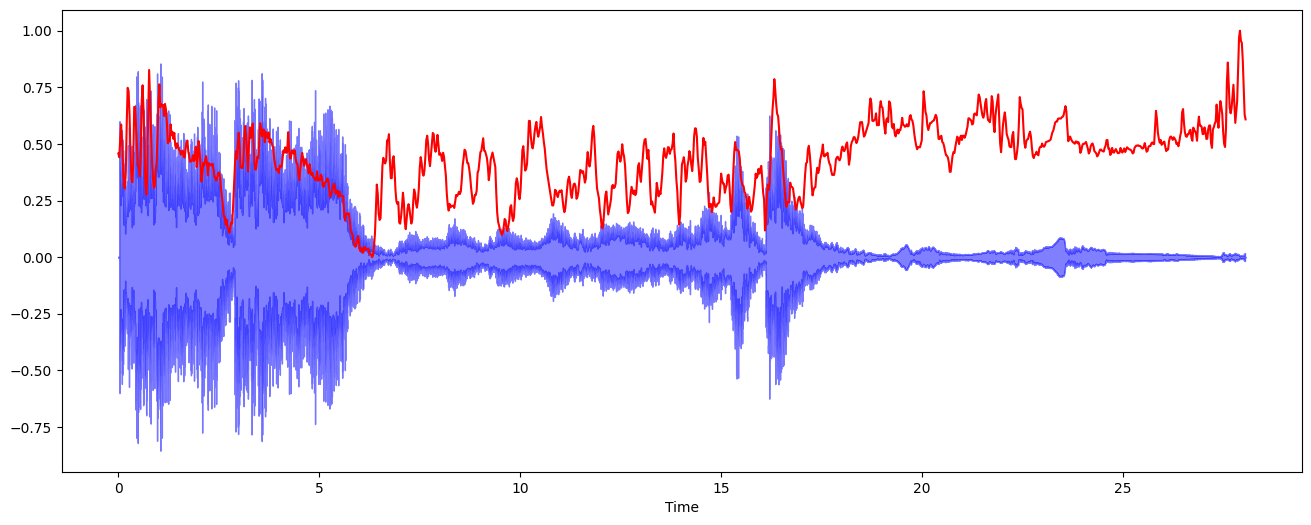

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t=librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color ='r')
plt.show()

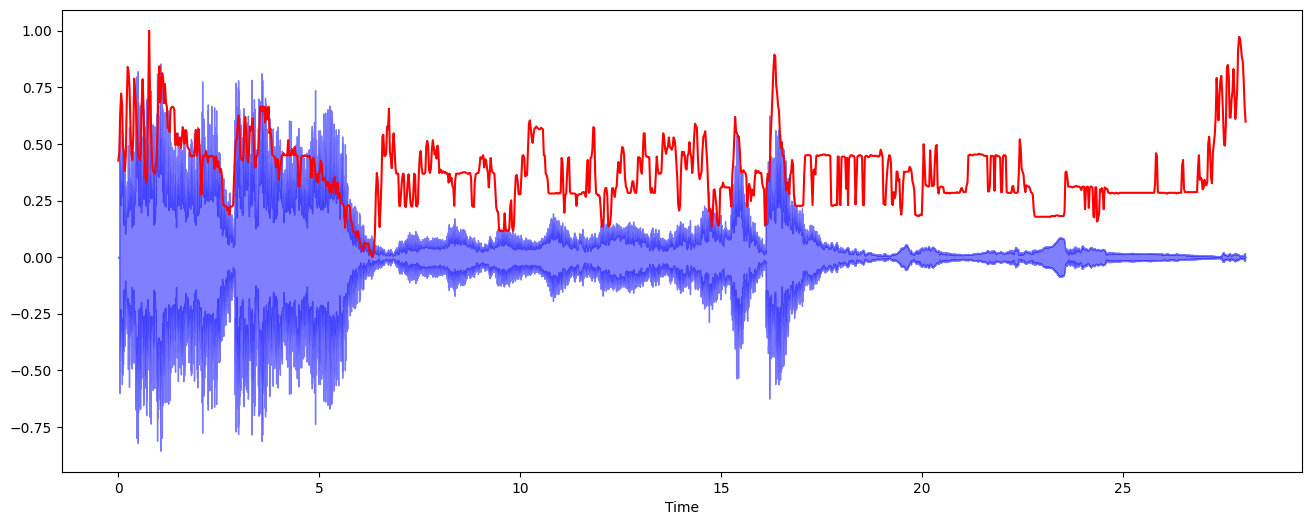

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color = 'r')
plt.show()

.

.

.

.

.